In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\eric9\Downloads\output_semifinal.csv")

df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\eric9\\Downloads\\output_semifinal.csv'

In [ ]:
df.groupby('main_category')['price'].mean()

In [ ]:
df.groupby('sub1_category')['price'].mean().sort_values()

In [ ]:
df.groupby('sub2_category')['price'].mean().sort_values()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 적용 (NanumGothic)
plt.rcParams['font.family'] = 'NanumGothic'

# 남녀 구분을 제거하는 함수 (문자열이 아닐 경우 예외 처리 추가)
def remove_gender(cat):
    if isinstance(cat, str):  # 문자열인지 확인
        parts = cat.split('/')
        if parts[0].lower() in ['men', 'women']:  # 대소문자 구분 제거
            return '/'.join(parts[1:]).strip()
    return cat  # NaN 또는 다른 데이터 타입일 경우 그대로 반환

# 'category_name' 컬럼에서 남녀 구분 제거 후 새로운 컬럼 생성
df['new_category'] = df['category_name'].apply(remove_gender)

# 각 제품 카테고리별 빈도수 계산 (상위 50개)
main_category_counts = df['new_category'].value_counts().head(50)

# 그래프 그리기 (수평 막대그래프)
plt.figure(figsize=(12, 8))
sns.barplot(x=main_category_counts.values, y=main_category_counts.index, palette="viridis")
plt.title("상위 50개 제품 카테고리 분포 (남녀 구분 제거)")
plt.xlabel("건수")
plt.ylabel("제품 카테고리")
plt.tight_layout()
plt.show()


In [ ]:
df

In [ ]:
df.loc[df['main_category'].str.contains('girl', na=False), 'main_category'] = 'kids'


In [ ]:
df[df['main_category'].str.contains('tops & blouses', na=False)]

In [ ]:
df.loc[df['main_category'].str.contains('boys', na=False), 'main_category'] = 'kids'

In [ ]:
df.loc[df['main_category'].str.contains('tops', na=False), 'main_category'] = 'tops & blouses'

In [ ]:
# 그룹별 price진행

df.groupby('new_category')['price'].mean().sort_values()

In [ ]:
df['main_category'].unique()

In [ ]:
# df.to_csv(r"C:\Users\eric9\Downloads\output_3.csv", index=False)

# print("✅ Google Drive에 파일 저장 완료!")

In [ ]:
before_df = df.copy()  # 동일한 필터링된 데이터를 another 변수에 저장
df = df

In [ ]:
df['avg_price_from_new_categoty'] = df['new_category'].map(df.groupby('new_category')['price'].mean())
#avg_price 라고 했으면 시리즈 형태로 따로 저장되었을것임.

In [ ]:
before_df['med_price_from_new_categoty'] = before_df['new_category'].map(before_df.groupby('new_category')['price'].median())
#avg_price 라고 했으면 시리즈 형태로 따로 저장되었을것임.



In [ ]:
import matplotlib.pyplot as plt

# x축: before_df['med_price_from_new_categoty']
# y축: 해당 값의 등장 횟수 (counts)
x = before_df['med_price_from_new_categoty']
y = x.value_counts().sort_index()  # 정렬하여 순서 유지

# 곡선형 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(y.index, y.values, marker='o', linestyle='-', color='b', linewidth=2, label="Count")

# 라벨 및 제목 설정
plt.xlabel("Median Price from New Category")
plt.ylabel("Count")
plt.title("Count Distribution of Median Price from New Category")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


In [ ]:
before_df

In [ ]:
before_df['price_sell_med_new_categoty'] = (before_df['price'] >= before_df['med_price_from_new_categoty']).astype(int)

In [ ]:
before_df['price_sell_med_new_categoty'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('main_category')
plt.ylabel('Count')
plt.title('Category Count Bar Plot')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

In [ ]:
before_df

In [ ]:
df
# 평균완료

In [ ]:
df['price_sell_new_categoty'] = (df['price'] >= df['avg_price_from_new_categoty']).astype(int)
#팔리면 0 안팔리면 1

In [ ]:
df

In [ ]:
# df.to_csv(r"C:\Users\eric9\Downloads\output_3.csv", index=False)

# print("✅ Google Drive에 파일 저장 완료!")

In [ ]:
dff = pd.read_csv(r"C:\Users\eric9\Downloads\output_semifinal4.csv")

In [ ]:
dff

In [ ]:
dff['price_sell_new_categoty'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('main_category')
plt.ylabel('Count')
plt.title('Category Count Bar Plot')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

In [ ]:
# 상위 50개 new_category 추출
top_50_categories = df['new_category'].value_counts().head(50).index  # 상위 50개 카테고리 리스트

# dff에서 해당하는 new_category만 필터링
filtered_dff = dff[dff['new_category'].isin(top_50_categories)]

# 필터링된 데이터에서 price_sell_new_categoty 개수 확인
category_counts = filtered_dff['price_sell_new_categoty'].value_counts()

# 결과 출력
print(category_counts)


In [ ]:
import matplotlib.pyplot as plt

# 전체 개수 대비 비율(%) 계산
category_counts_percent = (category_counts / category_counts.sum()) * 100

# 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts_percent.plot(kind='bar', color=['skyblue', 'salmon'])

# 라벨 및 제목 설정
plt.xlabel("Price Sell Category (0: sold, 1: not sold)")
plt.ylabel("Percentage (%)")
plt.title("Percentage Distribution of Price Sell Category for Top 50 New Categories")
plt.xticks(rotation=0)

# y축 값 퍼센트 표시
for index, value in enumerate(category_counts_percent):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# 그래프 출력
plt.show()


In [ ]:
# 카테고리별 shipping 정도 확인


In [ ]:
# category별 shipping(0/1)에 따른 평균 가격 계산
shipping_avg_price = dff.groupby(['new_category', 'shipping'])['price'].mean().unstack()

# 0과 1의 백분율 변환
shipping_avg_price_percentage = shipping_avg_price.div(shipping_avg_price.sum(axis=1), axis=0) * 100

# 0과 1의 차이를 백분율로 계산
shipping_avg_price_percentage['percentage_diff'] = ((shipping_avg_price[0] - shipping_avg_price[1]) / (shipping_avg_price[0] + shipping_avg_price[1])) * 100

# 결과 출력
print(shipping_avg_price_percentage)


In [ ]:
# category별 shipping(0/1)에 따른 평균 가격 계산
shipping_avg_price = dff.groupby(['main_category', 'shipping'])['price'].mean().unstack()

# 0과 1의 백분율 변환
shipping_avg_price_percentage = shipping_avg_price.div(shipping_avg_price.sum(axis=1), axis=0) * 100


# 결과 출력
print(shipping_avg_price_percentage)
# 0 : 구매자가 배송비 부담 / 1 : 판매자가 배송비 부담

In [ ]:
import matplotlib.pyplot as plt

# 꺾은선 그래프 (Line Plot) 그리기
plt.figure(figsize=(25, 5))
plt.plot(shipping_avg_price_percentage.index, shipping_avg_price_percentage[0], marker='o', linestyle='-', label='Buyer Pays (0)')
plt.plot(shipping_avg_price_percentage.index, shipping_avg_price_percentage[1], marker='s', linestyle='-', label='Seller Pays (1)')

# 그래프 제목 및 라벨 설정
plt.xlabel("Main Category")
plt.ylabel("Percentage (%)")
plt.title("Shipping Payment Distribution by Category")
plt.xticks(rotation=45)  # X축 라벨 회전
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 표시

# 그래프 출력
plt.show()


In [ ]:


# category별 shipping(0/1)에 따른 평균 가격 계산
shipping_avg_price = dff.groupby(['main_category', 'shipping'])['price'].mean().unstack()

# 0과 1의 백분율 변환
shipping_avg_price_percentage = shipping_avg_price.div(shipping_avg_price.sum(axis=1), axis=0) * 100

# shipping_avg_price와 shipping_avg_price_percentage를 dff에 추가하기 위해 main_category 기준으로 병합
dff = dff.merge(shipping_avg_price.rename(columns={0: 'avg_price_shipping_0', 1: 'avg_price_shipping_1'}), 
                on='main_category', how='left')

dff = dff.merge(shipping_avg_price_percentage.rename(columns={0: 'shipping_0_percentage', 1: 'shipping_1_percentage'}), 
                on='main_category', how='left')

# 결과 확인
print(dff.head())


In [3]:
df5 = pd.read_csv(r"C:\Users\eric9\Downloads\output_semifinal5.csv")

df5

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,...,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,...,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,...,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,...,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,...,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,...,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,...,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,...,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,...,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,...,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005


In [4]:
# 판매 예상에 사용할 가중치 내용중 shipping data columns 넣기.


# category별 shipping(0/1)에 따른 평균 가격 계산
shipping_avg_price = df5.groupby(['main_category', 'shipping'])['price'].mean().unstack()

# 0과 1의 백분율 변환
shipping_avg_price_percentage = shipping_avg_price.div(shipping_avg_price.sum(axis=1), axis=0) * 100

# # shipping_avg_price와 shipping_avg_price_percentage를 dff에 추가하기 위해 main_category 기준으로 병합
# df5 = df5.merge(shipping_avg_price.rename(columns={0: 'avg_price_shipping_0', 1: 'avg_price_shipping_1'}), 
#                 on='main_category', how='left')

df5 = df5.merge(shipping_avg_price_percentage.rename(columns={0: 'shipping_0_percentage', 1: 'shipping_1_percentage'}), 
                on='main_category', how='left')

# 결과 확인
df5.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,...,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,...,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,...,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,...,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,...,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,...,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104


In [5]:
# 결과 확인
df5.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,...,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,...,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,...,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,...,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,...,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,...,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104


In [6]:
# 최대 표시할 컬럼 수를 50개로 확장
pd.set_option('display.max_columns', 50)

In [7]:
df5['words_counts_sum'] = df5['positive_count'] / ((df5['positive_count'] + df5['negative_count']).replace(0, 1))
# LLM 분석 기반 긍 부정 판단. 긍정률  높음 : 1.0% 

In [8]:
df5['words_counts_sum']

0          1.0
1          1.0
2          1.0
3          0.0
4          1.0
          ... 
1481656    1.0
1481657    0.0
1481658    1.0
1481659    0.0
1481660    1.0
Name: words_counts_sum, Length: 1481661, dtype: float64

In [9]:
df5['words_counts_sum'].isna().sum()
# 분모값이 0일 때 나타나는 오류 없음. 분모값이 0이면 df5['words_counts_sum'] = 0이 되도록 작성 확인

0

In [10]:
df5 #shipping, words, trend 완성.

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,positive_words,negative_count,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage,words_counts_sum
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,['great'],0,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104,1.0
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,['soft'],0,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553,1.0
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,"['superior', 'safe', 'perfect']",0,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388,1.0
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,[],0,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976,0.0
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,['cute'],0,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,"['super', 'cute']",0,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037,50.849427,49.150573,1.0
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,[],1,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105,56.631770,43.368230,0.0
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,['great'],0,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045,56.397024,43.602976,1.0
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,[],0,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005,60.427612,39.572388,0.0


In [11]:
# price

# df['price_vs_avg_price'] = (1 - (df['price'] / df['avg_price_from_new_categoty'].astype(float))) * 100

# df['price_vs_avg_price'] = df['price_vs_avg_price'].clip(0, 100)

In [12]:
df5['condition_label'] = df5['item_condition_id'].map({1: 'high', 2: 'middle', 3: 'middle', 4: 'low', 5: 'low'})
# 컬럼 상 중 하로 나눔
# 비율 : 1>3>2>4>5로 1을 상 / 2, 3을 중 / 4, 5를 하로 나눔. 이유는 내 맘임 이렇게 하고 싶었음.

In [13]:
df5

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,positive_words,negative_count,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage,words_counts_sum,condition_label
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,['great'],0,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104,1.0,middle
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,['soft'],0,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553,1.0,high
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,"['superior', 'safe', 'perfect']",0,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388,1.0,high
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,[],0,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976,0.0,high
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,['cute'],0,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104,1.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,"['super', 'cute']",0,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037,50.849427,49.150573,1.0,middle
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,[],1,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105,56.631770,43.368230,0.0,middle
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,['great'],0,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045,56.397024,43.602976,1.0,middle
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,[],0,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005,60.427612,39.572388,0.0,middle


In [14]:
df5['condition_label_num'] = df5['condition_label'].map({ 'high' : 1, 'middle' : 2/3, 'low' : 1/3 })
# condition을 숫자형태로 변환 완료

In [15]:
df5

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,positive_words,negative_count,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage,words_counts_sum,condition_label,condition_label_num
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,['great'],0,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104,1.0,middle,0.666667
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,['soft'],0,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553,1.0,high,1.000000
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,"['superior', 'safe', 'perfect']",0,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388,1.0,high,1.000000
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,[],0,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976,0.0,high,1.000000
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,['cute'],0,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104,1.0,high,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,"['super', 'cute']",0,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037,50.849427,49.150573,1.0,middle,0.666667
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,[],1,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105,56.631770,43.368230,0.0,middle,0.666667
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,['great'],0,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045,56.397024,43.602976,1.0,middle,0.666667
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,[],0,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005,60.427612,39.572388,0.0,middle,0.666667


In [16]:

# price

df5['price_vs_avg_price'] = (1 - (df5['price'] / df5['avg_price_from_new_categoty'].astype(float))+0.5) * 100

# df['price_vs_avg_price'] = df['price_vs_avg_price'].clip(0, 100)

In [17]:
df5['price_vs_avg_price'].sort_values()

801746    -10673.118332
223801    -10017.337479
1291537    -7988.380297
679729     -7711.192811
1035312    -7438.040869
               ...     
72540        148.305938
693367       148.305938
494929       148.305938
485155       148.305938
1151002      148.305938
Name: price_vs_avg_price, Length: 1481661, dtype: float64

In [18]:
(df5['price_vs_avg_price'] < 0).sum()

229776

In [19]:
df5['price_vs_avg_price'] = df5['price_vs_avg_price'].clip(0, 100) #price 값이 평균보다 크면 다 0으로 치환

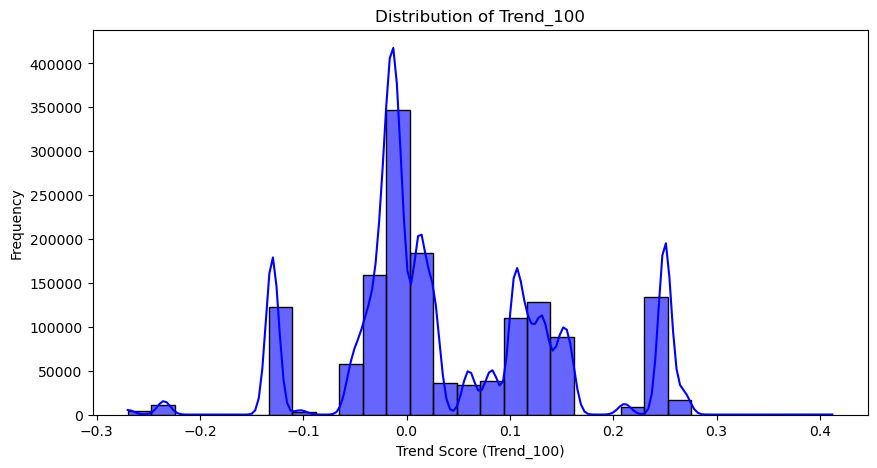

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 + KDE 그래프 그리기
plt.figure(figsize=(10, 5))
sns.histplot(df5['Trend_100'], bins=30, kde=True, color='b', alpha=0.6)

# 그래프 제목 및 라벨 설정
plt.xlabel("Trend Score (Trend_100)")
plt.ylabel("Frequency")
plt.title("Distribution of Trend_100")

# 그래프 출력
plt.show()


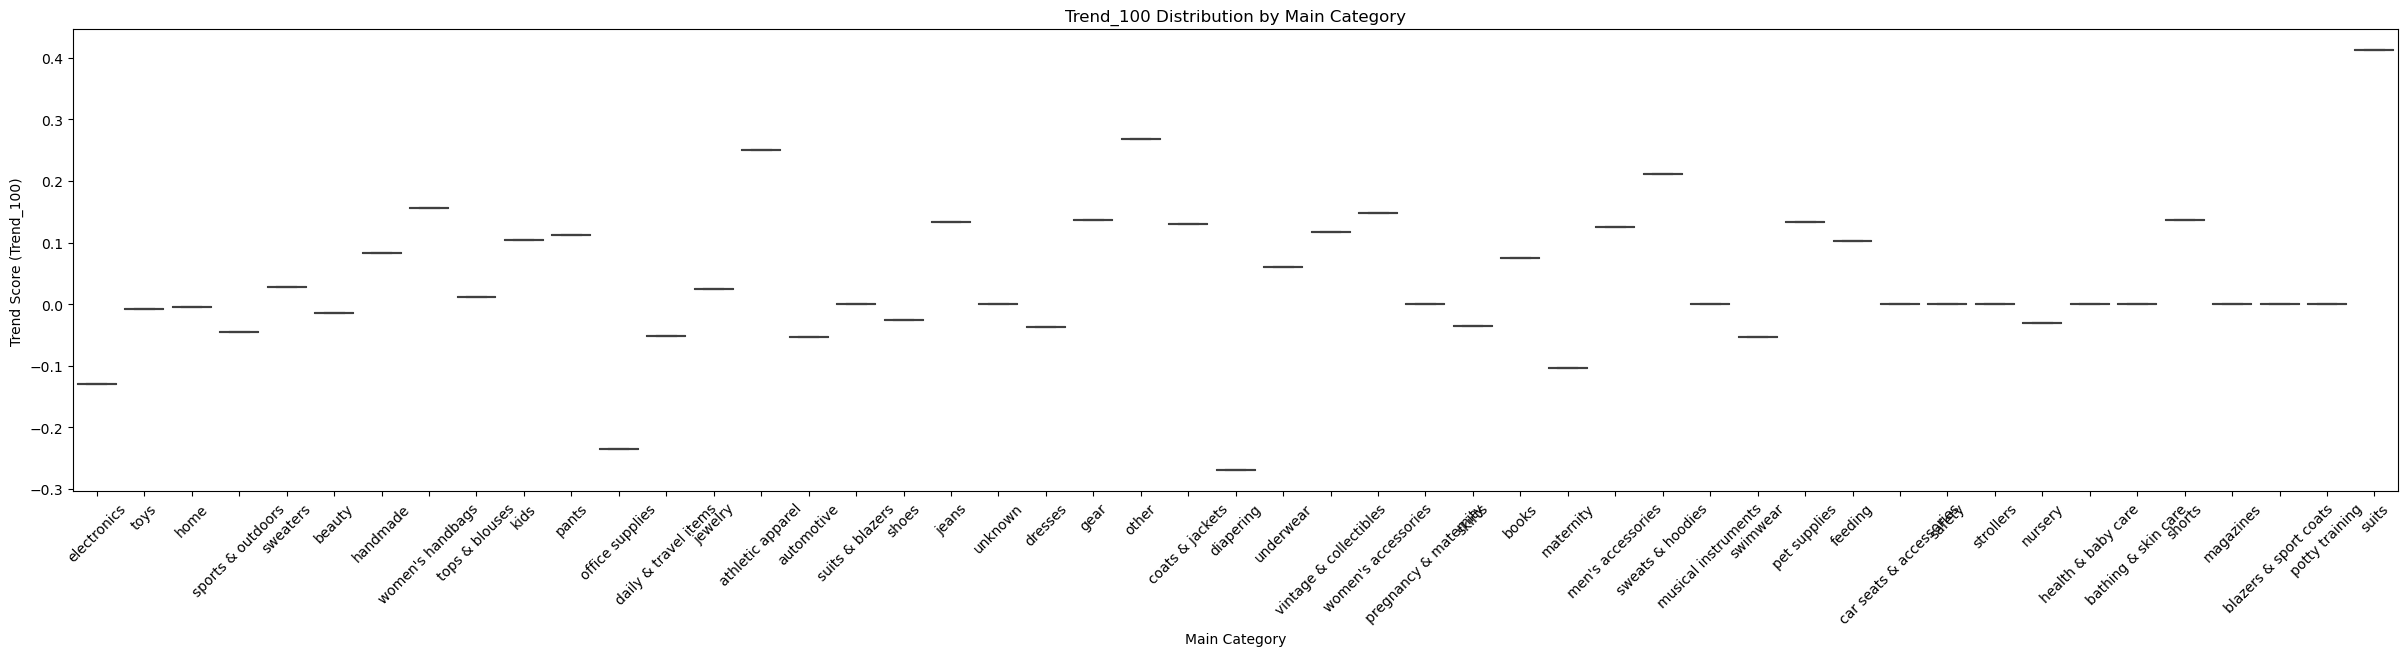

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(30, 6))

# 박스 플롯 그리기
sns.boxplot(x="main_category", y="Trend_100", data=df5, palette="coolwarm")

# 그래프 제목 및 라벨 설정
plt.xlabel("Main Category")
plt.ylabel("Trend Score (Trend_100)")
plt.title("Trend_100 Distribution by Main Category")

# X축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()


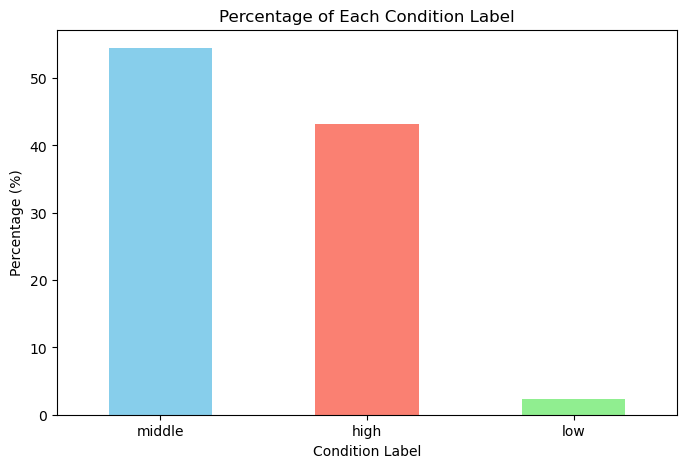

In [32]:
import matplotlib.pyplot as plt

# condition_label 별 개수(count) 계산
condition_counts = df5['condition_label'].value_counts()

# 전체 데이터 대비 백분율(%) 변환
condition_percentage = (condition_counts / condition_counts.sum()) * 100

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
condition_percentage.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])

# 그래프 제목 및 라벨 설정
plt.xlabel("Condition Label")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Each Condition Label")
plt.xticks(rotation=0)

# 그래프 출력
plt.show()


In [22]:
df5 #가중치 부여할 price, shipping, words(글자분석), condition, trends 진행 완료.

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,positive_words,negative_count,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage,words_counts_sum,condition_label,condition_label_num,price_vs_avg_price
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,['great'],0,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104,1.0,middle,0.666667,28.827141
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,['soft'],0,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553,1.0,high,1.000000,76.580890
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,"['superior', 'safe', 'perfect']",0,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388,1.0,high,1.000000,0.000000
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,[],0,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976,0.0,high,1.000000,79.366196
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,['cute'],0,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104,1.0,high,1.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,"['super', 'cute']",0,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037,50.849427,49.150573,1.0,middle,0.666667,84.441935
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,[],1,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105,56.631770,43.368230,0.0,middle,0.666667,69.087477
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,['great'],0,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045,56.397024,43.602976,1.0,middle,0.666667,94.220248
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,[],0,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005,60.427612,39.572388,0.0,middle,0.666667,0.000000


In [23]:
#가중치는 중요도 기준으로 진행. 
# price : 0.4, conditino : 0.25 , word (글자분석): 0.15, shipping : 0.1 , trend : 0.1 

In [24]:
df5['Trend'].describe() # 너무 작아... *1000

count    1.468004e+06
mean     4.020938e-04
std      1.066035e-03
min     -2.700000e-03
25%     -1.500000e-04
50%      1.200000e-04
75%      1.170000e-03
max      4.120000e-03
Name: Trend, dtype: float64

In [25]:
df5['Trend_100'] = df5['Trend']*100

In [26]:
df5['Trend_100'] = df5['Trend_100'].clip(-10, 10)

In [27]:
df5['Trend_100'].describe()

count    1.468004e+06
mean     4.020938e-02
std      1.066035e-01
min     -2.700000e-01
25%     -1.500000e-02
50%      1.200000e-02
75%      1.170000e-01
max      4.120000e-01
Name: Trend_100, dtype: float64

In [28]:
df5['selected_shipping_percentage'] = df5.apply(
    lambda row: row['shipping_0_percentage'] if row['shipping'] == 0 else row['shipping_1_percentage'], axis=1)
# shipping 값이 1이면 column 이 hipping_1_percentage 부분에서 값을 가져와 가중치에 적용하고 0 이면 hipping_0_percentage에서 가져오는

In [29]:
df5

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,positive_words,negative_count,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage,words_counts_sum,condition_label,condition_label_num,price_vs_avg_price,Trend_100,selected_shipping_percentage
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,['great'],0,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104,1.0,middle,0.666667,28.827141,-0.130,64.592896
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,['soft'],0,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553,1.0,high,1.000000,76.580890,-0.008,60.202447
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,"['superior', 'safe', 'perfect']",0,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388,1.0,high,1.000000,0.000000,-0.005,60.427612
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,[],0,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976,0.0,high,1.000000,79.366196,-0.045,56.397024
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,['cute'],0,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104,1.0,high,1.000000,100.000000,-0.130,35.407104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,"['super', 'cute']",0,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037,50.849427,49.150573,1.0,middle,0.666667,84.441935,-0.037,49.150573
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,[],1,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105,56.631770,43.368230,0.0,middle,0.666667,69.087477,0.105,56.631770
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,['great'],0,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045,56.397024,43.602976,1.0,middle,0.666667,94.220248,-0.045,56.397024
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,[],0,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005,60.427612,39.572388,0.0,middle,0.666667,0.000000,-0.005,39.572388


In [30]:
#price_vs_avg_price*0.4 + words_counts_sum*0.15 + condition_label_num*0.25 + Trend*0.1 + selected_shipping_percentage*0.1 = 구매예상율
#가중치에 들어가는 값은 최대가 100이 되어야. 

In [31]:
pp = df5['price_vs_avg_price']*0.4 + df5['words_counts_sum']*100*0.15 + df5['condition_label_num']*100*0.25 + df5['Trend_100']*10*0.1 + df5['selected_shipping_percentage']*0.1

In [33]:
pp.sort_values()

11905      11.600274
9317       11.637782
1244735    11.637782
192161     11.637782
648259     11.637782
             ...    
1481369          NaN
1481383          NaN
1481573          NaN
1481602          NaN
1481615          NaN
Length: 1481661, dtype: float64

In [34]:
df5['Trend_100'].isna().sum()

13657

In [35]:
df5['Trend_100']= df5['Trend_100'].fillna(0)

In [36]:
df5['Trend_100'].isna().sum()

0

In [37]:
pp = df5['price_vs_avg_price']*0.4 + df5['words_counts_sum']*100*0.15 + df5['condition_label_num']*100*0.25 + df5['Trend_100']*10*0.1 + df5['selected_shipping_percentage']*0.1

In [38]:
pp.sort_values()

11905      11.600274
9317       11.637782
648259     11.637782
1244735    11.637782
192161     11.637782
             ...    
1095853    86.638839
1129489    86.638839
703313     86.638839
1044708    86.638839
269568     86.638839
Length: 1481661, dtype: float64

In [39]:
df5['sellability'] = df5['price_vs_avg_price']*0.4 + df5['words_counts_sum']*100*0.15 + df5['condition_label_num']*100*0.25 + df5['Trend_100']*10*0.1 + df5['selected_shipping_percentage']*0.1

In [40]:
df5

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,words_counts,positive_count,positive_words,negative_count,negative_words,main_category,sub1_category,sub2_category,sub3_category,sub4_category,new_category,avg_price_from_new_categoty,price_sell_new_categoty,Trend,shipping_0_percentage,shipping_1_percentage,words_counts_sum,condition_label,condition_label_num,price_vs_avg_price,Trend_100,selected_shipping_percentage,sellability
0,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,36,1,['great'],0,"['works', 'work']",electronics,computers & tablets,components & parts,unknown,unknown,electronics/computers & tablets/components & p...,42.913900,1,-0.00130,64.592896,35.407104,1.0,middle,0.666667,28.827141,-0.130,64.592896,49.526813
1,46,metallic purple slime with sparkles,1,kids/toys/arts & crafts,unknown,8.0,0,"this slime is approximately 1.5 ounces, very s...",38,1,['soft'],0,['works'],toys,toys,arts & crafts,unknown,unknown,kids/toys/arts & crafts,10.896346,0,-0.00008,60.202447,39.797553,1.0,high,1.000000,76.580890,-0.008,60.202447,76.644601
2,72,listing for aknuckles1,1,home/home décor/home fragrance,nostalgia electrics,35.0,0,warmers pictured & 6 sample packages of highly...,159,3,"['superior', 'safe', 'perfect']",0,['works'],home,home décor,home fragrance,unknown,unknown,home/home décor/home fragrance,22.160184,1,-0.00005,60.427612,39.572388,1.0,high,1.000000,0.000000,-0.005,60.427612,46.037761
3,86,jillian michaels bodyshred fitness dvd,1,sports & outdoors/exercise/fitness technology,unknown,39.0,0,this boxed set of 12 dvd’s includes the fitnes...,59,0,[],0,['work'],sports & outdoors,exercise,fitness technology,unknown,unknown,sports & outdoors/exercise/fitness technology,55.214356,0,-0.00045,56.397024,43.602976,0.0,high,1.000000,79.366196,-0.045,56.397024,62.341181
4,175,paw paw usb cable saver costume,1,"electronics/cell phones & accessories/cases, c...",unknown,6.0,1,2 x usb cable saver usb data charger cable sav...,167,1,['cute'],0,['works'],electronics,cell phones & accessories,"cases, covers & skins",unknown,unknown,"electronics/cell phones & accessories/cases, c...",13.178632,0,-0.00130,64.592896,35.407104,1.0,high,1.000000,100.000000,-0.130,35.407104,83.410710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,free people inspired dress,2,women/dresses/mid-calf,free people,20.0,1,"lace, says size small but fits medium perfectl...",22,2,"['super', 'cute']",0,[],dresses,dresses,mid-calf,unknown,unknown,dresses/mid-calf,30.507307,0,-0.00037,50.849427,49.150573,1.0,middle,0.666667,84.441935,-0.037,49.150573,70.321498
1481657,1482531,little mermaid handmade dress,2,kids/girls 2t-5t/dresses,disney,14.0,0,little mermaid handmade dress never worn size 2t,8,0,[],1,['worn'],kids,girls 2t-5t,dresses,unknown,unknown,kids/girls 2t-5t/dresses,17.302637,0,0.00105,56.631770,43.368230,0.0,middle,0.666667,69.087477,0.105,56.631770,50.069834
1481658,1482532,21 day fix containers and eating plan,2,sports & outdoors/exercise/fitness accessories,unknown,12.0,0,"used once or twice, still in great shape.",8,1,['great'],0,[],sports & outdoors,exercise,fitness accessories,unknown,unknown,sports & outdoors/exercise/fitness accessories,21.513183,0,-0.00045,56.397024,43.602976,1.0,middle,0.666667,94.220248,-0.045,56.397024,74.949468
1481659,1482533,world markets lanterns,3,home/home décor/home décor accents,unknown,45.0,1,there is 2 of each one that you see! so 2 red ...,28,0,[],0,[],home,home décor,home décor accents,unknown,unknown,home/home décor/home décor accents,22.203802,1,-0.00005,60.427612,39.572388,0.0,middle,0.666667,0.000000,-0.005,39.572388,20.618905


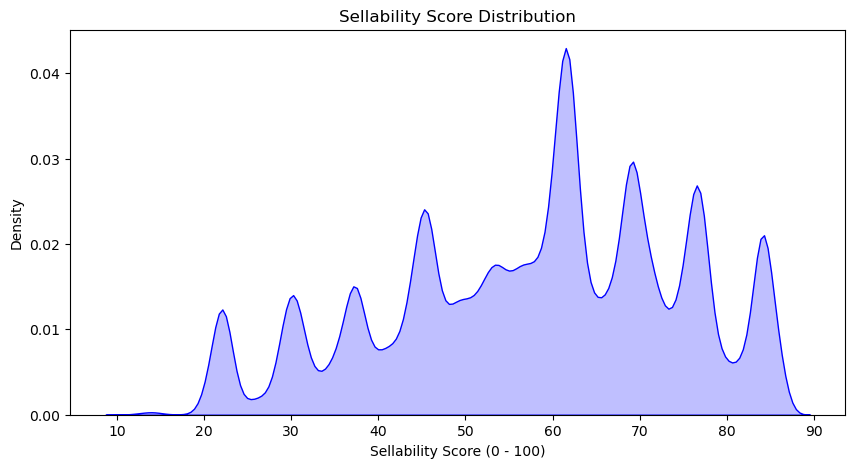

In [41]:
# 곡선형 그래프 (밀도 그래프, KDE Plot) 그리기
plt.figure(figsize=(10, 5))
sns.kdeplot(df5['sellability'], fill=True, color='b')

# 그래프 제목 및 라벨 설정
plt.xlabel("Sellability Score (0 - 100)")
plt.ylabel("Density")
plt.title("Sellability Score Distribution")

# 그래프 출력
plt.show()


✅ Google Drive에 파일 저장 완료!


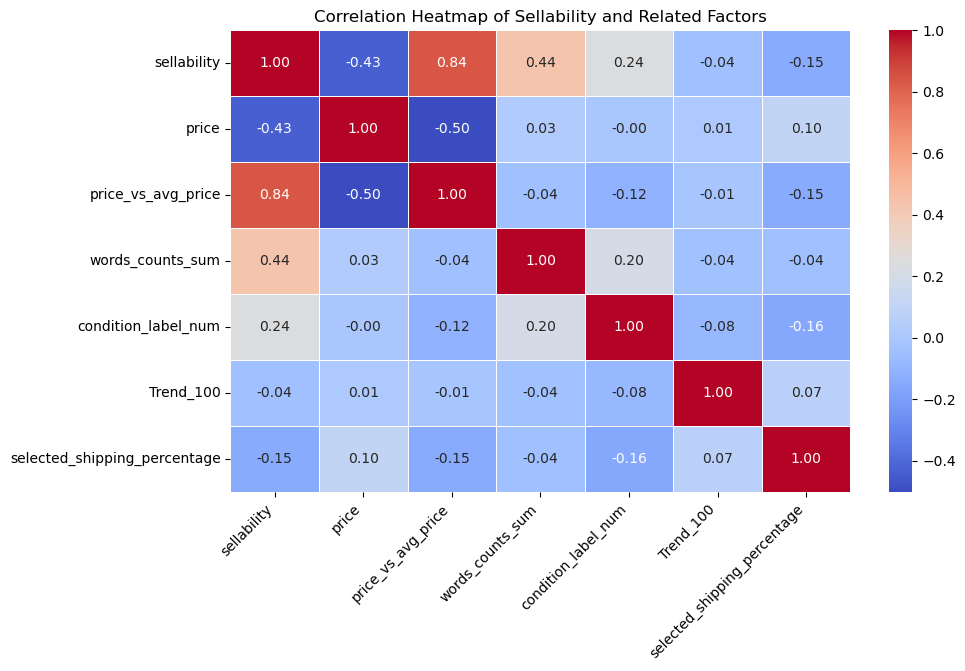

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 주요 컬럼 선택
correlation_cols = ['sellability', 'price', 'price_vs_avg_price', 'words_counts_sum', 
                    'condition_label_num', 'Trend_100', 'selected_shipping_percentage']

# 상관관계 계산
corr_matrix = df5[correlation_cols].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.xticks(rotation=45, ha="right")

# 그래프 제목 설정
plt.title("Correlation Heatmap of Sellability and Related Factors")

# 그래프 출력
plt.show()

